
# <p><center style="background-color:#ffffff;font-family:Gabriola;color:#662200;font-size:210%;text-align:center;border-radius:10px 70px;"> 🎯  Mall Customer Segmentation Data 🎯 </center></p>


# <p><center style="background-color:#ffffee;font-family:Gabriola;color:#662200;font-size:210%;text-align:center;border-radius:10px 70px;"> 🖐  Customer Segmentation (K-Means) - Analysis 🙂 </center></p>

# About Dataset
#### Context

- This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.


# SUMMARY

- Read and Understand the Data
- Exploratory Data Analysis
- KMeans Clustering and KMeans Model Predictions


In [1]:
#Importing the  librarires for analysis & ML

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder

from scipy.stats import kurtosis,skew,pearsonr
from scipy.cluster.hierarchy import linkage, dendrogram

from scipy.spatial.distance import cdist

<a id="2"></a>
# <p style="padding:10px;background-color:#eff6ff;margin:0;color:#6666ff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Read, Explore the Data and Make Preprocess </p>

In [2]:
#Importing the dataset

df=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

# look the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# check the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# check the missing value - Null 
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- - 📄 No any missing data / missing value 

In [5]:
# let show the describe the numeric feature 
df.describe().round(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


#### Note
##### we see the the result
- The Min age 18 and the Max 70 but the Avg 39 . it`s make sence
- The Min Annual Income 15 K but the Max 137 K and the Avg 60 K, I think there outlier
- The Min Spending Score 1 and the Max 99 and the Avg 50 , I think there outlier

In [6]:
#check if there any duplication 
df.duplicated().sum()

0

- 📄 We don`t have Duplicated values

In [7]:
# the shape 
print (f"We have {df.shape[0]} Rows and {df.shape[1]} columns")

We have 200 Rows and 5 columns


<a id="2"></a>
# <p style="padding:10px;background-color:#ffffff;margin:0;color:#666600;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Explore Data using some Visuals </p>

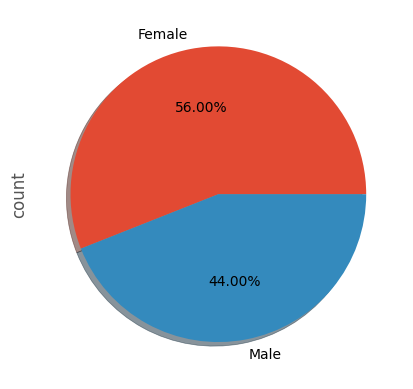

In [8]:
# how many Gender in the dataset

df["Gender"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True)
plt.show()

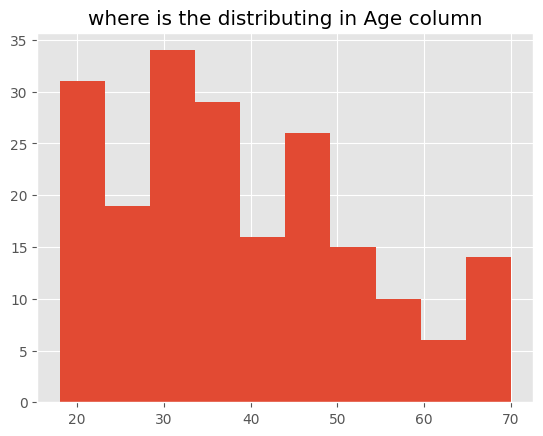

In [9]:
# using histogram, to show the Age columns where is the distributing

plt.hist (data= df, x="Age")
plt.title("where is the distributing in Age column")
plt.show()

- I see the more age coming from 18-22 and 28 - 35 

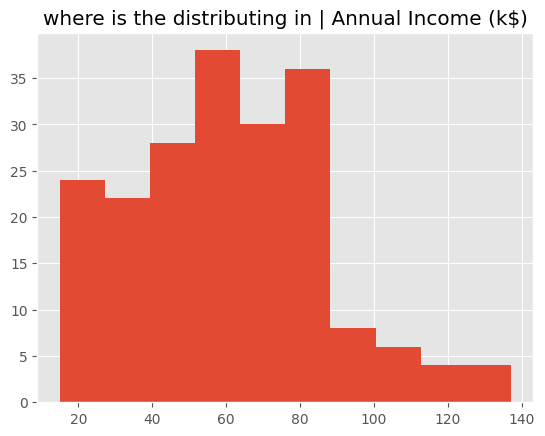

In [10]:
# using histogram, to show the | Annual Income (k$) | columns where is the distributing

plt.hist (data= df, x="Annual Income (k$)")
plt.title("where is the distributing in | Annual Income (k$)")
plt.show()

- I see the distributing Annual Income from 55K to 82K

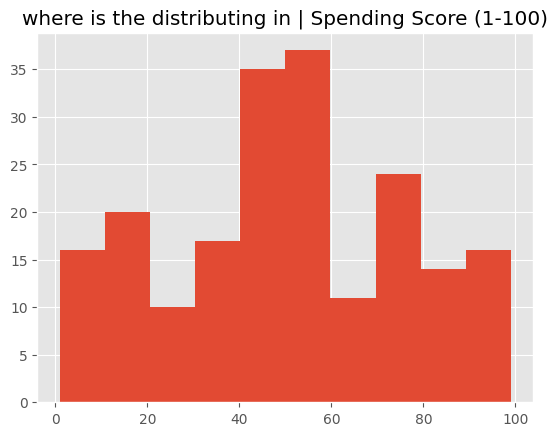

In [11]:
# using histogram, to show the | Spending Score (1-100) | columns where is the distributing

plt.hist (data= df, x="Spending Score (1-100)")
plt.title("where is the distributing in | Spending Score (1-100)")
plt.show()

- I see the distributing Spending Score from 40 to 60

In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'show the relation between Age and Income with Gender')

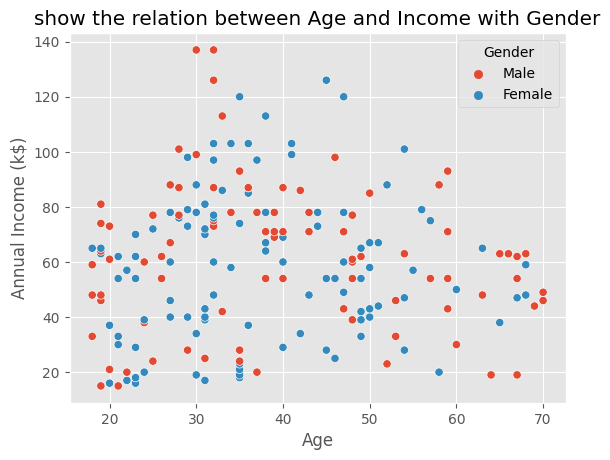

In [13]:
#show the relation between Age and Income with Gender 

sns.scatterplot(data=df, x="Age",y="Annual Income (k$)",hue="Gender")
plt.title("show the relation between Age and Income with Gender")


- I see no any relation there 

Text(0.5, 1.0, 'show the relation between Age and Spending Score (1-100) with Gender')

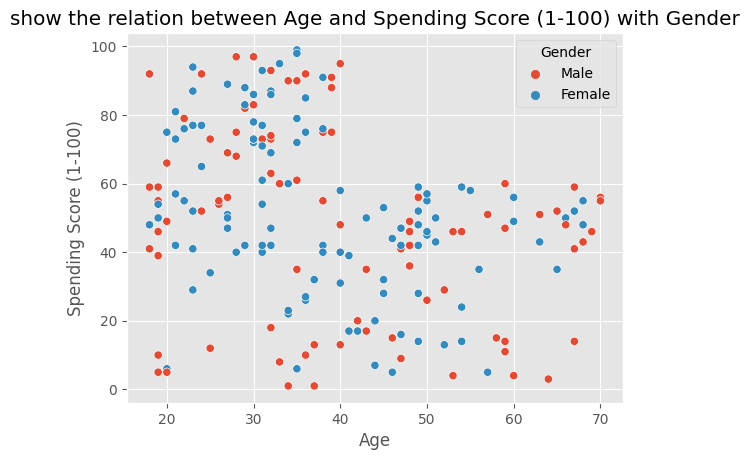

In [14]:
#show the relation between Age and Spending Score (1-100)  with Gender 

sns.scatterplot(data=df, x="Age",y="Spending Score (1-100)",hue="Gender")
plt.title("show the relation between Age and Spending Score (1-100) with Gender")

- I see the age under 40 years spend more than age up 40, and there female spend more than male 

Text(0.5, 1.0, 'show the relation between |Annual Income (k$)| and |Spending Score (1-100)| with Gender')

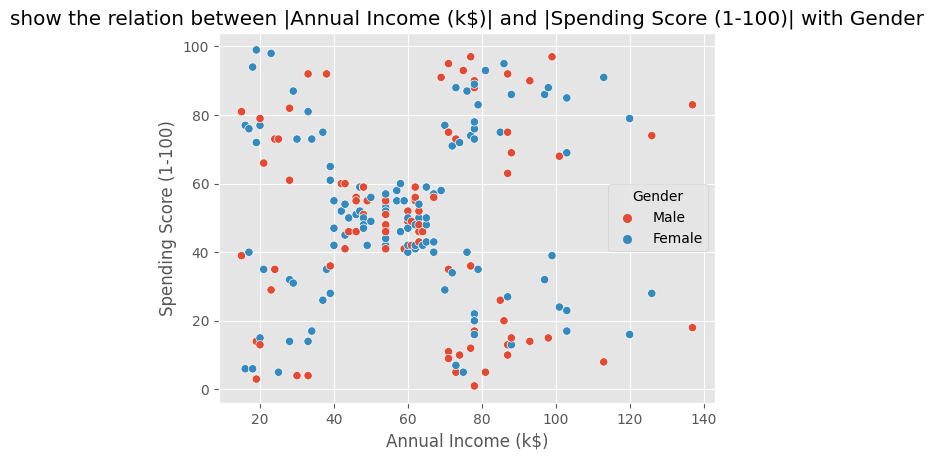

In [15]:
#show the relation between Annual Income (k$)  and Spending Score (1-100) with Gender 

sns.scatterplot(data=df, x="Annual Income (k$)",y="Spending Score (1-100)",hue="Gender")
plt.title("show the relation between |Annual Income (k$)| and |Spending Score (1-100)| with Gender")

- There no clear relation, but I see the category Annual Income 40K-80K they spending 40-60 score

Text(0.5, 0.98, 'Boxplots of the Numerical Variables')

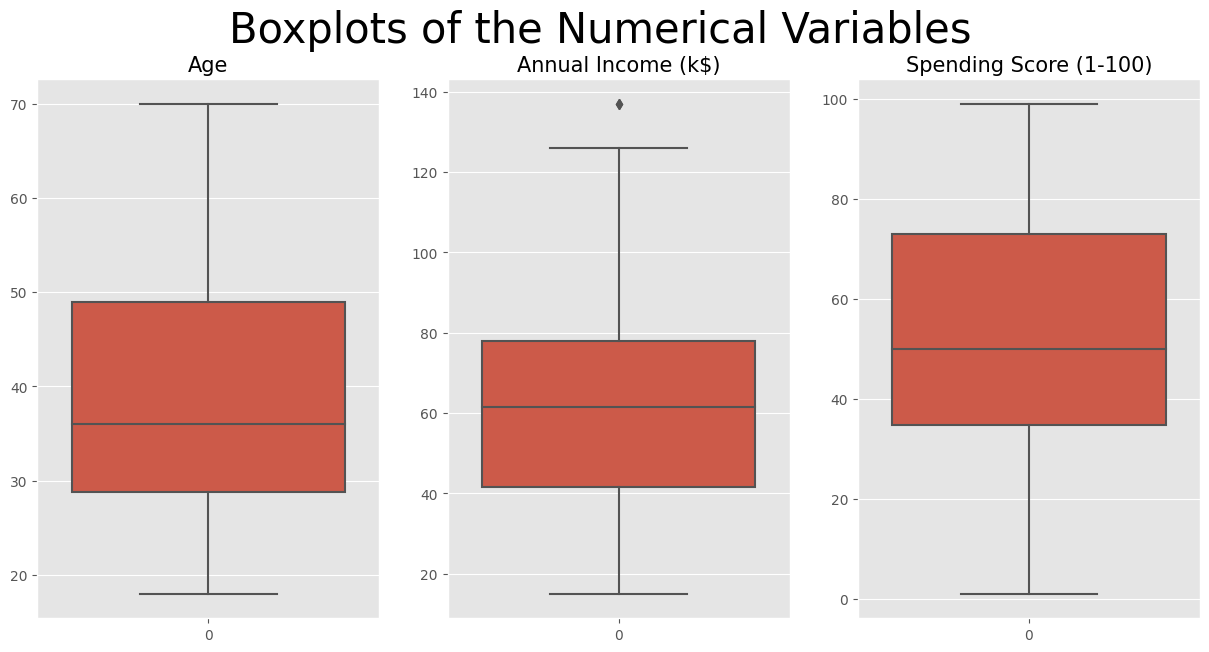

In [16]:
#cheak if there outlier

fig,(a1,a2,a3) = plt.subplots(ncols=3,figsize=(15,7))

a1 = sns.boxplot(df['Age'],ax=a1)
a1.set_title('Age',fontsize=15)

a2 = sns.boxplot(df['Annual Income (k$)'],ax=a2)
a2.set_title('Annual Income (k$)',fontsize=15)

a3 = sns.boxplot(df['Spending Score (1-100)'],ax=a3)
a3.set_title('Spending Score (1-100)',fontsize=15)

fig.suptitle("Boxplots of the Numerical Variables",fontsize=30)    


<a id="2"></a>
# <p style="padding:10px;background-color:#eeffff;margin:0;color:#666666;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Results on the Analysis  </p>

- The Min age 18 and the Max 70 but the Avg 39 . it`s make sence
- The Min Annual Income 15 K but the Max 137 K and the Avg 60 K, I think there outlier
- The Min Spending Score 1 and the Max 99 and the Avg 50 , I think there outlier

- We have Gender - Male 44% and Female 56%

- Distributing in Age column  from 18-22 and 28 - 35
- The distributing Annual Income from 55K to 82K
- Distributing Spending Score from 40 to 60
- No relation between Age and Income with Gender

- The age under 40 years spend more than age up 40, and there female spend more than male

- There no clear relation, but I see the category Annual Income 40K-80K they spending 40-60 score

##### Note:
- No any missing data / missing value
- We don`t have Duplicated values

<a id="2"></a>
# <p style="padding:10px;background-color:#eeffff;margin:0;color:#666666;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Building a Machine Learning Model || K-Means  </p>

In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
#drop column Customer ID
df.drop(['CustomerID'],inplace =True,axis = 1)

In [19]:
# Label Encoder for change column Gerder from String to number 0,1 

encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])
#show the data
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


- I want do two model one with normal data and second one with normalize data 

In [20]:
#copy data 

df_1 = df.copy()
df_2= df.copy()

In [21]:
# bulid model using KMeans 

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_1)
    kmeanModel.fit(df_1)
 
    distortions.append(sum(np.min(cdist(df_1, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_1.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_1, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_1.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [22]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 35.58782757352547
2 : 30.122051138558877
3 : 24.020507648685765
4 : 20.479478504105884
5 : 17.773099154184546
6 : 15.448663692811202
7 : 14.590198982443505
8 : 13.859280193965628
9 : 13.16986747509115


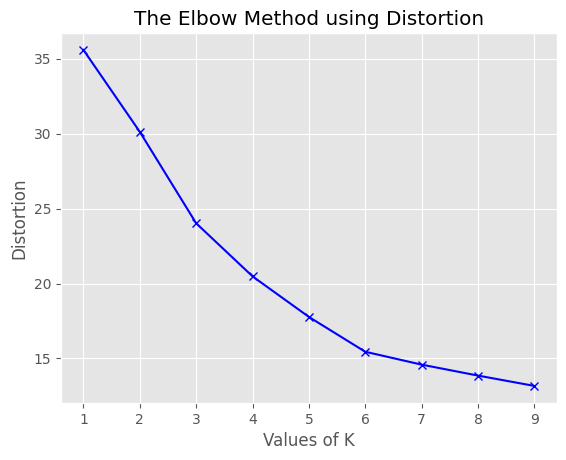

In [23]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

- I see the best Elbow = 4 || I mean 4 Cluster

In [24]:
#Initiating the Agglomerative Clustering model 
K_C = KMeans(n_clusters=4)
# fit model and predict clusters
yhat_KC = K_C.fit_predict(df_1)
#PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df_1["Clusters"]= yhat_KC

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
df_1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,3
3,0,23,16,77,1
4,0,31,17,40,3


- now build model with normalization

In [26]:
df_2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [27]:
scaler = StandardScaler()

scaled_columns = df_2.columns

df_2[scaled_columns] = scaler.fit_transform(df_2[scaled_columns])

df_2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [28]:
# bulid model using KMeans 

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_1)
    kmeanModel.fit(df_2)
 
    distortions.append(sum(np.min(cdist(df_2, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_2.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_2, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_2.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [29]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.9311679086931692
2 : 1.660605870155713
3 : 1.4596318657465737
4 : 1.2893558821364854
5 : 1.191205454834948
6 : 1.1055294923129235
7 : 0.9985214211199049
8 : 0.913846769900948
9 : 0.8515668394190663


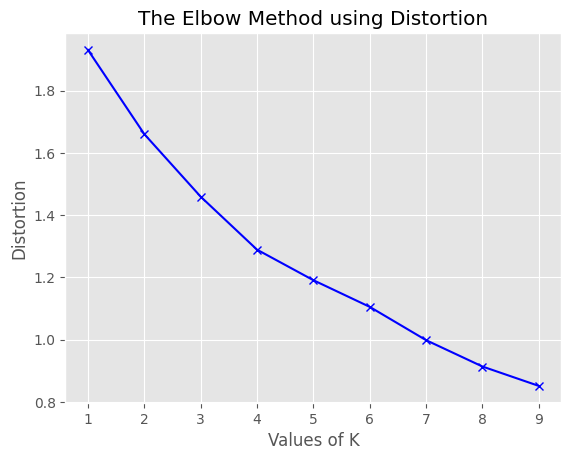

In [30]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

- Don't big difference and scale the data I will choose 4 Elbow , 4 claster

In [31]:
#Initiating the Agglomerative Clustering model 
K_C = KMeans(n_clusters=4)
# fit model and predict clusters
yhat_KC = K_C.fit_predict(df_2)
#PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df_2["Clusters"]= yhat_KC

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
df_2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1.128152,-1.424569,-1.738999,-0.434801,1
1,1.128152,-1.281035,-1.738999,1.195704,1
2,-0.886405,-1.352802,-1.700830,-1.715913,2
3,-0.886405,-1.137502,-1.700830,1.040418,0
4,-0.886405,-0.563369,-1.662660,-0.395980,2


In [33]:
df_1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,3
3,0,23,16,77,1
4,0,31,17,40,3


<a id="2"></a>
# <p style="padding:10px;background-color:#eeeeee;margin:0;color:#ff6666;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Comparing 2 Model  </p>

Text(0.5, 0.98, 'Comparing 2 Model')

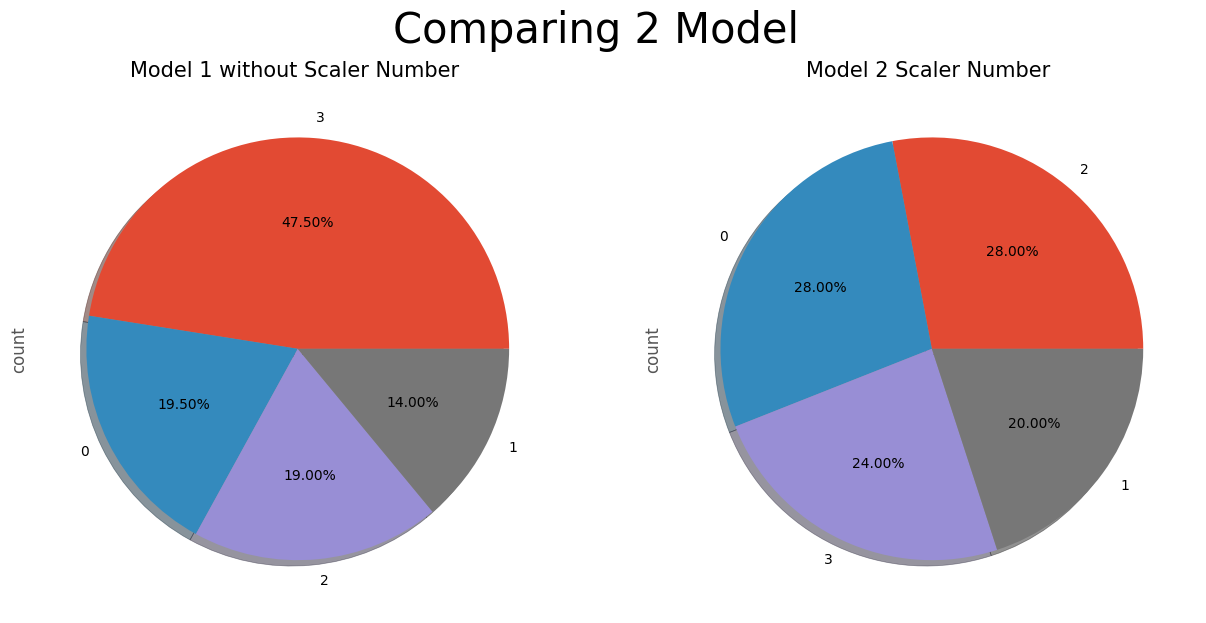

In [34]:
#cheak if there outlier

fig,(a1,a2) = plt.subplots(ncols=2,figsize=(15,7))

a1 = df_1["Clusters"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True,ax=a1)
a1.set_title('Model 1 without Scaler Number ',fontsize=15)

a2 = df_2["Clusters"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True,ax=a2)
a2.set_title('Model 2 Scaler Number ',fontsize=15)



fig.suptitle("Comparing 2 Model",fontsize=30)    


Text(0.5, 0.98, 'Comparing 2 Model')

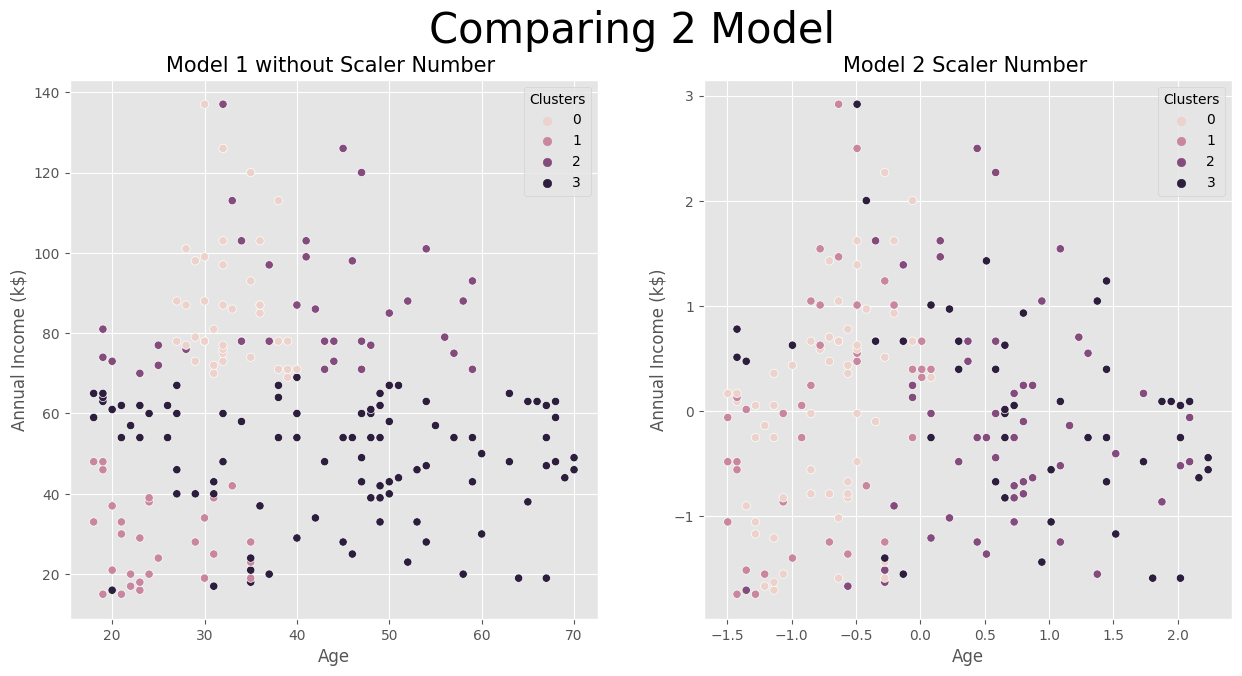

In [35]:
#cheak if there outlier

fig,(a1,a2) = plt.subplots(ncols=2,figsize=(15,7))

a1 = sns.scatterplot(df_1, x="Age", y= "Annual Income (k$)",hue="Clusters",ax=a1)
a1.set_title('Model 1 without Scaler Number ',fontsize=15)

a2 = sns.scatterplot(df_2, x="Age", y= "Annual Income (k$)",hue="Clusters",ax=a2)
a2.set_title('Model 2 Scaler Number ',fontsize=15)



fig.suptitle("Comparing 2 Model",fontsize=30)    

Text(0.5, 0.98, 'Comparing 2 Model')

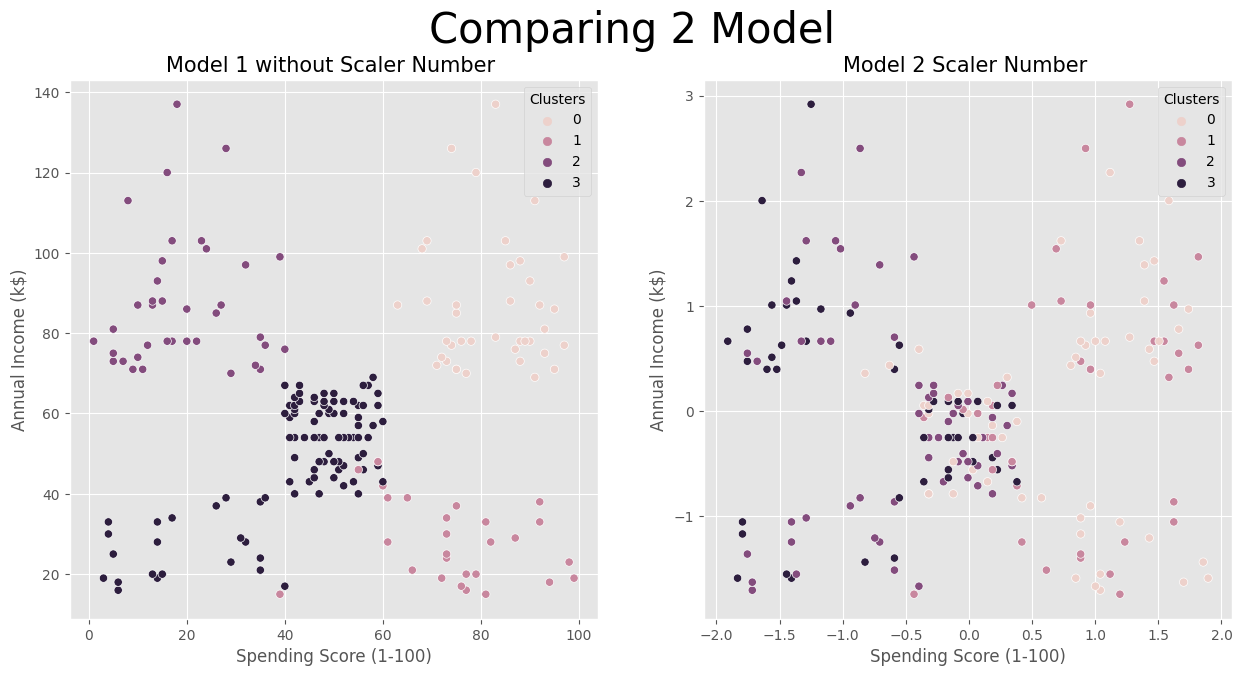

In [36]:
#cheak if there outlier

fig,(a1,a2) = plt.subplots(ncols=2,figsize=(15,7))

a1 = sns.scatterplot(df_1, x="Spending Score (1-100)", y= "Annual Income (k$)",hue="Clusters",ax=a1)
a1.set_title('Model 1 without Scaler Number ',fontsize=15)

a2 = sns.scatterplot(df_2, x="Spending Score (1-100)", y= "Annual Income (k$)",hue="Clusters",ax=a2)
a2.set_title('Model 2 Scaler Number ',fontsize=15)



fig.suptitle("Comparing 2 Model",fontsize=30)   

Text(0.5, 0.98, 'Comparing 2 Model')

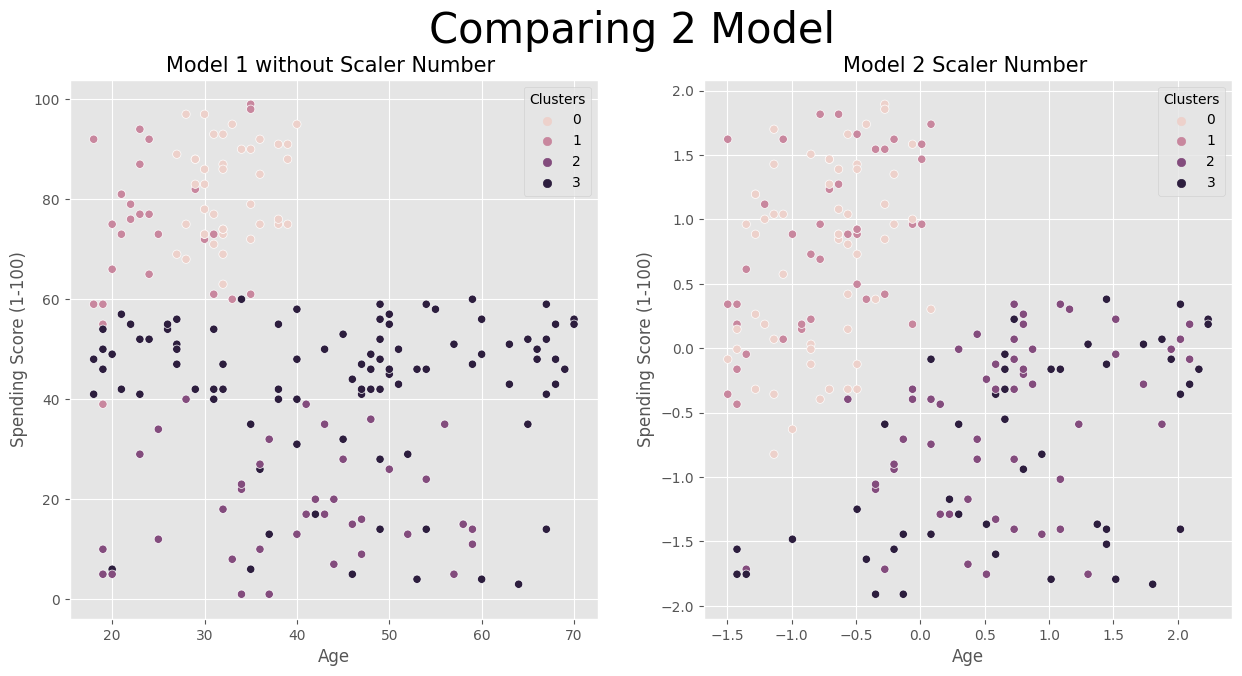

In [37]:
#cheak if there outlier

fig,(a1,a2) = plt.subplots(ncols=2,figsize=(15,7))

a1 = sns.scatterplot(df_1, x="Age", y= "Spending Score (1-100)",hue="Clusters",ax=a1)
a1.set_title('Model 1 without Scaler Number ',fontsize=15)

a2 = sns.scatterplot(df_2, x="Age", y= "Spending Score (1-100)",hue="Clusters",ax=a2)
a2.set_title('Model 2 Scaler Number ',fontsize=15)



fig.suptitle("Comparing 2 Model",fontsize=30)  

# <div style = 'border : 3px solid non; background-color:#ffffff;font-family:Gabriola;color:#000080; ; ;padding:10px'>
<p style="font-family:Georgia;padding:20px;line-height:25px;";><font style="font-family:Georgia; font-size:150%;">   </font>
    <p style = "font-size:200%; color:#800080"> 📌 Result ML</p>
    


## I see the first model without any scale number better than second model

## Now can claster Customer based on the spending money 

#  📲 Connect me:
-  <a href="https://www.kaggle.com/qusaybtoush1990">kaggle</a>
-  <a href="https://www.linkedin.com/in/qusayal-btoush/">Linkedin</a>
-  <a href="https://github.com/qusaybtoush">github</a>

# Vote ❤️😃
- Please Upvote my kernel if you like my work.🙌

# The End 🤝🎉🤝🎉
### 🖐 Thank you 🙏